This case study is based on Loan Prediction Based on Customer Behavior


In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios. You can use this flow as a template to solve any supervised ML classification problem.

The flow of the case study is as below:
* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

I know its a long list!! Take a deep breath... and let us get started!

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.



The goal is to learn from this data and predict if a new person will get loan or not based on their record.

In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the dataset
import pandas as pd
import numpy as np
loanDF=pd.read_csv('Training Data.csv', encoding='latin-1')
print('Shape before deleting duplicate values:', loanDF)

# Removing duplicate rows if any
loanDF=loanDF.drop_duplicates()
print('Shape After deleting duplicate values:', loanDF)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
loanDF.head(10)

Shape before deleting duplicate values:             Id   Income  Age  Experience Married/Single House_Ownership  \
0            1  1303834   23           3         single          rented   
1            2  7574516   40          10         single          rented   
2            3  3991815   66           4        married          rented   
3            4  6256451   41           2         single          rented   
4            5  5768871   47          11         single          rented   
...        ...      ...  ...         ...            ...             ...   
251995  251996  8154883   43          13         single          rented   
251996  251997  2843572   26          10         single          rented   
251997  251998  4522448   46           7         single          rented   
251998  251999  6507128   45           0         single          rented   
251999  252000  9070230   70          17         single          rented   

       Car_Ownership           Profession                 C

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [6]:
loanDF.set_index('Id', inplace=True)

In [7]:
loanDF.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Defining the problem statement: 
#### Create a Predictive model which can tell if a person will survive the titanic crash or not?
* Target Variable: Risk_Flag
* Predictors: age, income, experience etc.


* Risk_Flag=0 Loan will Approved
* Risk_Flag=1 Loan will not Approved

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<Axes: xlabel='Risk_Flag'>

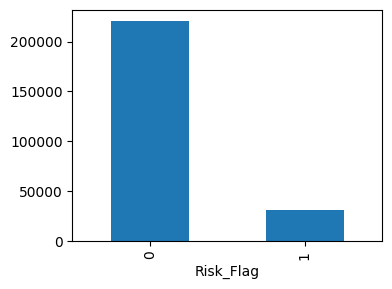

In [8]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=loanDF.groupby('Risk_Flag').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Risk_Flag?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [9]:
# Looking at sample rows in the data
loanDF.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
loanDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [11]:
# Looking at the descriptive statistics of the data
loanDF.describe(include='all')

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [12]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
loanDF.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Income</b>: Continuous. Selected
* <b>Age</b>: Continuous. Selected
* <b>Experience</b>: Continuous. Selected.
* <b>Married/Single</b>: Categorical. Selected
* <b>House_Ownership</b>: Categorical. Selected.
* <b>Car_Ownership</b>: Categorical. Selected.
* <b>CITY</b>: Rejected
* <b>Profession</b>: Rejected
* <b>STATE</b>: Rejected
* <b>CURRENT_JOB_YRS	</b>: Continuous. Selected
* <b>CURRENT_HOUSE_YRS</b>: Continuous. Selected
* <b>Risk_Flag</b>: Categorical. Selected. This is the <b>Target Variable!</b>


# Removing useless columns from the data

In [13]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['CITY','STATE','Profession']
loanDF = loanDF.drop(UselessColumns,axis=1)
loanDF.head(10)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,
1,1303834,23,3,single,rented,no,3,13,0
2,7574516,40,10,single,rented,no,9,13,0
3,3991815,66,4,married,rented,no,4,10,0
4,6256451,41,2,single,rented,yes,2,12,1
5,5768871,47,11,single,rented,no,3,14,1
6,6915937,64,0,single,rented,no,0,12,0
7,3954973,58,14,married,rented,no,8,12,0
8,1706172,33,2,single,rented,no,2,14,0
9,7566849,24,17,single,rented,yes,11,11,0


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 


We use bar charts to see how the data is distributed for these categorical columns.

In [14]:
loanDF.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [15]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

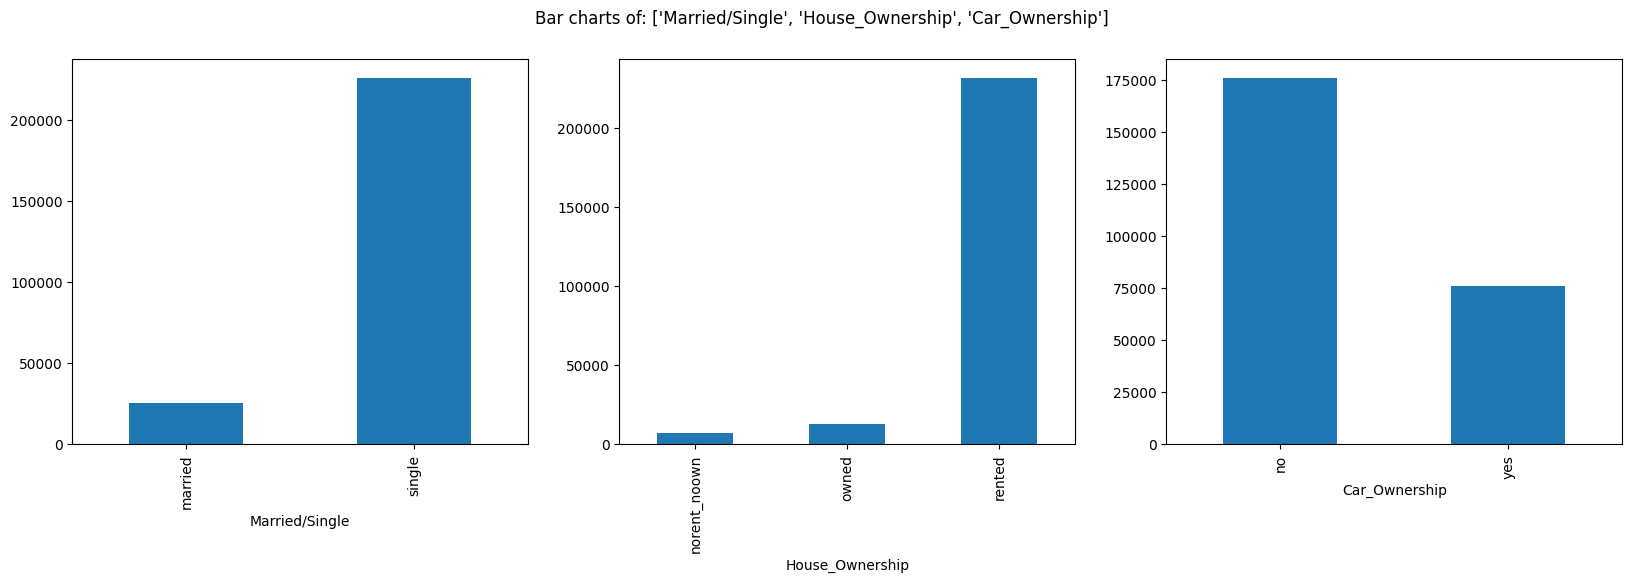

In [16]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=loanDF, colsToPlot=['Married/Single', 'House_Ownership',
       'Car_Ownership'])

## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'Married/Single', 'House_Ownership',
       'Car_Ownership'

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'CURRENT_JOB_YRS'}>],
       [<Axes: title={'center': 'CURRENT_HOUSE_YRS'}>, <Axes: >]],
      dtype=object)

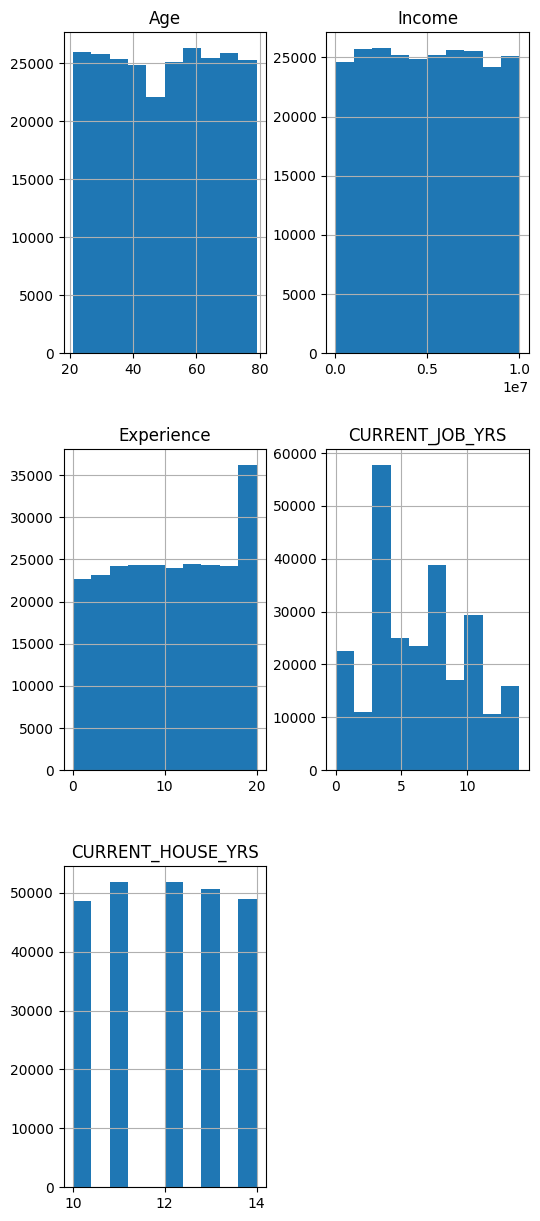

In [17]:
# Plotting histograms of multiple columns together
# Observe that Fare has outliers
loanDF.hist(['Age', 'Income','Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], figsize=(6,15))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 175 rows in data that has a age between 20 to 30.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. The distribution is good.
* <b>Income</b>: Selected. The distribution is good.
* <b>Experience</b>: Selected. The distribution is good.
* <b>CURRENT_JOB_YRS</b>: Selected. The distribution is good.
* <b>CURRENT_HOUSE_YRS</b>: Selected. The distribution is good.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### No Outlier is here to treat.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [18]:
# Finding how many missing values are there for each column
loanDF.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### No missing Value

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

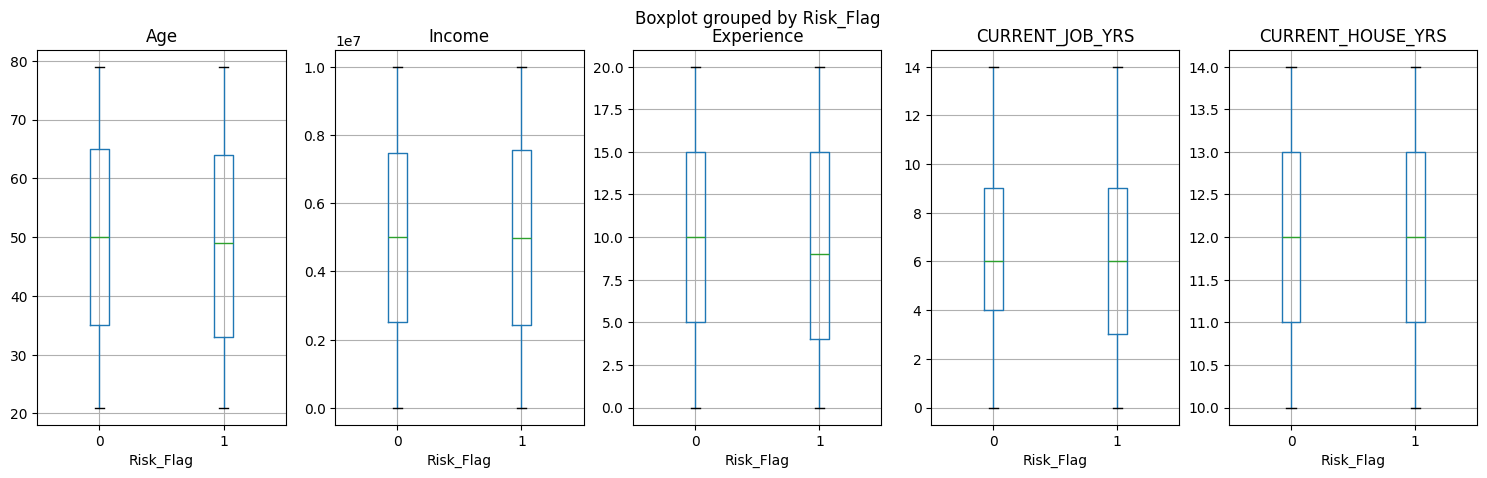

In [19]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Age', 'Income','Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    loanDF.boxplot(column=PredictorCol, by='Risk_Flag', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [20]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [21]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age', 'Income','Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
FunctionAnova(inpData=loanDF, TargetVariable='Risk_Flag', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with Risk_Flag | P-Value: 6.687623647499306e-28
Income is NOT correlated with Risk_Flag | P-Value: 0.1207220319583281
Experience is correlated with Risk_Flag | P-Value: 2.5475634865752383e-67
CURRENT_JOB_YRS is correlated with Risk_Flag | P-Value: 1.813221223267855e-17
CURRENT_HOUSE_YRS is correlated with Risk_Flag | P-Value: 0.028069472774381213


['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

The results of ANOVA confirm our visual analysis using box plots above.

Look at the P-Value of Income, it got rejected by a little margin!! In such scenarios you may decide to include this variable which is at the boundry line and see if it helps to increase the accuracy.

<b>Final selected Continuous columns:</b>

'Age','Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

In [22]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=loanDF['Married/Single'], columns=loanDF['Risk_Flag'])
CrossTabResult

Risk_Flag,0,1
Married/Single,,
married,23092,2636
single,197912,28360


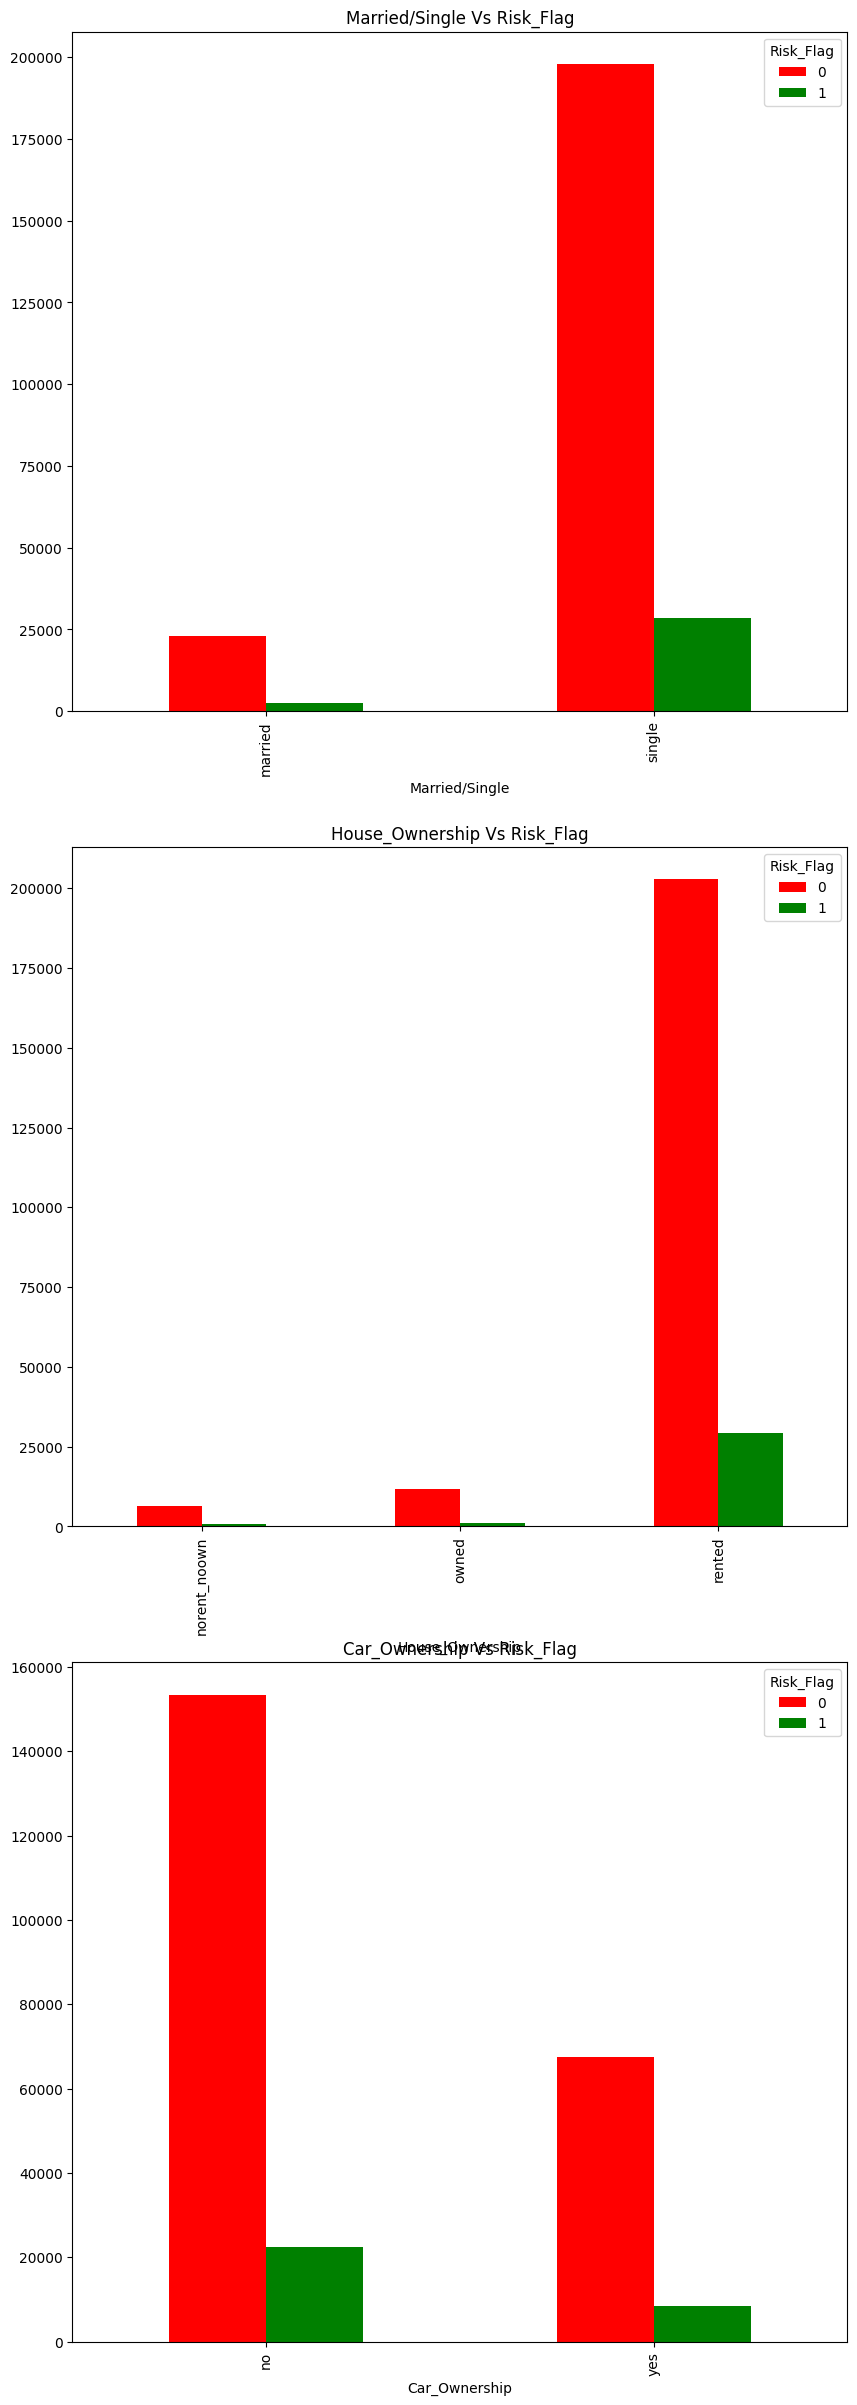

In [23]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Married/Single', 'House_Ownership',
       'Car_Ownership',]

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=loanDF[CategoricalCol], columns=loanDF['Risk_Flag'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Risk_Flag')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [24]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [25]:
CategoricalVariables=['Married/Single', 'House_Ownership',
       'Car_Ownership']

# Calling the function
FunctionChisq(inpData=loanDF, 
              TargetVariable='Risk_Flag',
              CategoricalVariablesList= CategoricalVariables)

Married/Single is correlated with Risk_Flag | P-Value: 3.7730537057152214e-26
House_Ownership is correlated with Risk_Flag | P-Value: 1.8381930028370595e-40
Car_Ownership is correlated with Risk_Flag | P-Value: 1.7350853850183746e-33


['Married/Single', 'House_Ownership', 'Car_Ownership']

<b>Finally selected Categorical variables:</b>

'Age', 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [26]:
SelectedColumns=['Age', 'Experience',
 'Married/Single',
 'House_Ownership',
 'Car_Ownership',
 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Selecting final columns
DataForML=loanDF[SelectedColumns]
DataForML.head()

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,
1,23,3,single,rented,no,3,13
2,40,10,single,rented,no,9,13
3,66,4,married,rented,no,4,10
4,41,2,single,rented,yes,2,12
5,47,11,single,rented,no,3,14


In [27]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.

## Converting the binary nominal variable to numeric using 1/0 mapping

In [28]:
DataForML.nunique()

Age                  59
Experience           21
Married/Single        2
House_Ownership       3
Car_Ownership         2
CURRENT_JOB_YRS      15
CURRENT_HOUSE_YRS     5
dtype: int64

In [29]:
# Converting the binary nominal variable sex to numeric
DataForML['Married/Single'].replace({'married':0, 'single':1}, inplace=True)
DataForML['Car_Ownership'].replace({'no':0, 'yes':1}, inplace=True)

In [30]:
DataForML.head()

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,
1,23,3,1,rented,0,3,13
2,40,10,1,rented,0,9,13
3,66,4,0,rented,0,4,10
4,41,2,1,rented,1,2,12
5,47,11,1,rented,0,3,14


## Converting the nominal variable to numeric using get_dummies()

In [31]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Risk']=loanDF['Risk_Flag']

# Printing sample rows
DataForML_Numeric.head()

,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Risk
Id,,,,,,,,,,
1,23,3,1,0,3,13,False,False,True,0
2,40,10,1,0,9,13,False,False,True,0
3,66,4,0,0,4,10,False,False,True,0
4,41,2,1,1,2,12,False,False,True,1
5,47,11,1,0,3,14,False,False,True,1


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [32]:
pd.reset_option('display.max_columns')

In [33]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'House_Ownership_norent_noown',
       'House_Ownership_owned', 'House_Ownership_rented', 'Risk'],
      dtype='object')

In [34]:
# Separate Target Variable and Predictor Variables
TargetVariable='Risk'
Predictors=['Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'House_Ownership_norent_noown',
       'House_Ownership_owned', 'House_Ownership_rented']

# Demonstration for deployment with final cols

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [35]:
X_train[0:4]

array([[73, 1, 1, 0, 1, 10, False, False, True],
       [79, 18, 1, 0, 3, 12, False, True, False],
       [54, 19, 1, 1, 4, 11, False, False, True],
       [63, 15, 1, 0, 13, 13, False, False, True]], dtype=object)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [3]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [199]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(176400, 9)
(176400,)
(75600, 9)
(75600,)


In [200]:
X_train[0:4]

array([[0.32758621, 0.6       , 1.        , 1.        , 0.78571429,
        0.25      , 0.        , 0.        , 1.        ],
       [0.87931034, 0.05      , 1.        , 0.        , 0.07142857,
        0.25      , 0.        , 0.        , 1.        ],
       [0.0862069 , 0.25      , 1.        , 0.        , 0.21428571,
        1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.75      , 0.        , 0.        , 0.92857143,
        0.75      , 0.        , 0.        , 1.        ]])

In [438]:
# # Inverse transform will bring back the original scale
# print(PredictorScalerFit.inverse_transform(X)[0:4])

[[ 3.      1.      1.      0.      7.25    0.      0.      1.    ]
 [ 1.      0.      1.      0.     71.2833  1.      0.      0.    ]
 [ 3.      0.      0.      0.      7.925   0.      0.      1.    ]
 [ 1.      0.      1.      0.     53.1     0.      0.      1.    ]]


# Logistic Regression

In [161]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

[[66374     0]
 [ 9226     0]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.8195642  0.8195642  0.8195642  0.8195642  0.81950737 0.81950737
 0.81950737 0.81950737 0.81950737 0.81950737]

Final Average Accuracy of the model: 0.82


# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

[[66374     0]
 [ 9226     0]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.8195642  0.8195642  0.8195642  0.8195642  0.81950737 0.81950737
 0.81950737 0.81950737 0.81950737 0.81950737]

Final Average Accuracy of the model: 0.82


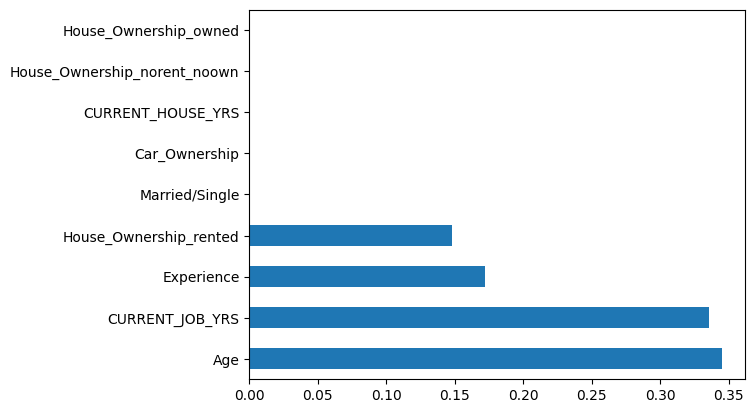

In [164]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Individual predictions

In [166]:
DataForML.head()

,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,
1,23,3,1,rented,0,3,13
2,40,10,1,rented,0,9,13
3,66,4,0,rented,0,4,10
4,41,2,1,rented,1,2,12
5,47,11,1,rented,0,3,14


In [167]:
Predictors

['Age',
 'Experience',
 'Married/Single',
 'Car_Ownership',
 'CURRENT_JOB_YRS',
 'CURRENT_HOUSE_YRS',
 'House_Ownership_norent_noown',
 'House_Ownership_owned',
 'House_Ownership_rented']

### Plotting a Decision Tree

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="CURRENT_JOB_YRS <= 2.5\nentropy = 0.539\nsamples = 176400\nvalue = [154630, 21770]\nclass = 0"] ;
1 [label="Age <= 31.5\nentropy = 0.624\nsamples = 23551\nvalue = [19880, 3671]\nclass = 0"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Experience <= 0.5\nentropy = 0.726\nsamples = 4523\nvalue = [3609, 914]\nclass = 0"] ;
1 -> 2 ;
3 [label="entropy = 0.808\nsamples = 1433\nvalue = [1078, 355]\nclass = 0"] ;
2 -> 3 ;
4 [label="entropy = 0.682\nsamples = 3090\nvalue = [2531, 559]\nclass = 0"] ;
2 -> 4 ;
5 [label="Age <= 34.5\nentropy = 0.597\nsamples = 19028\nvalue = [16271, 2757]\nclass = 0"] ;
1 -> 5 ;
6 [label="entropy = 0.371\nsamples = 1234\nvalue = [1146, 88]\nclass = 0"] ;
5 -> 6 ;
7 [label="entropy = 0.61\nsamples = 17794\nvalue = [15125, 2669]\nclass = 0"] ;
5 -> 7 ;
8 [label="Age <= 33.5\nentropy = 0.525\nsamples = 152849\nvalue = [134750, 18099]\nclass = 0

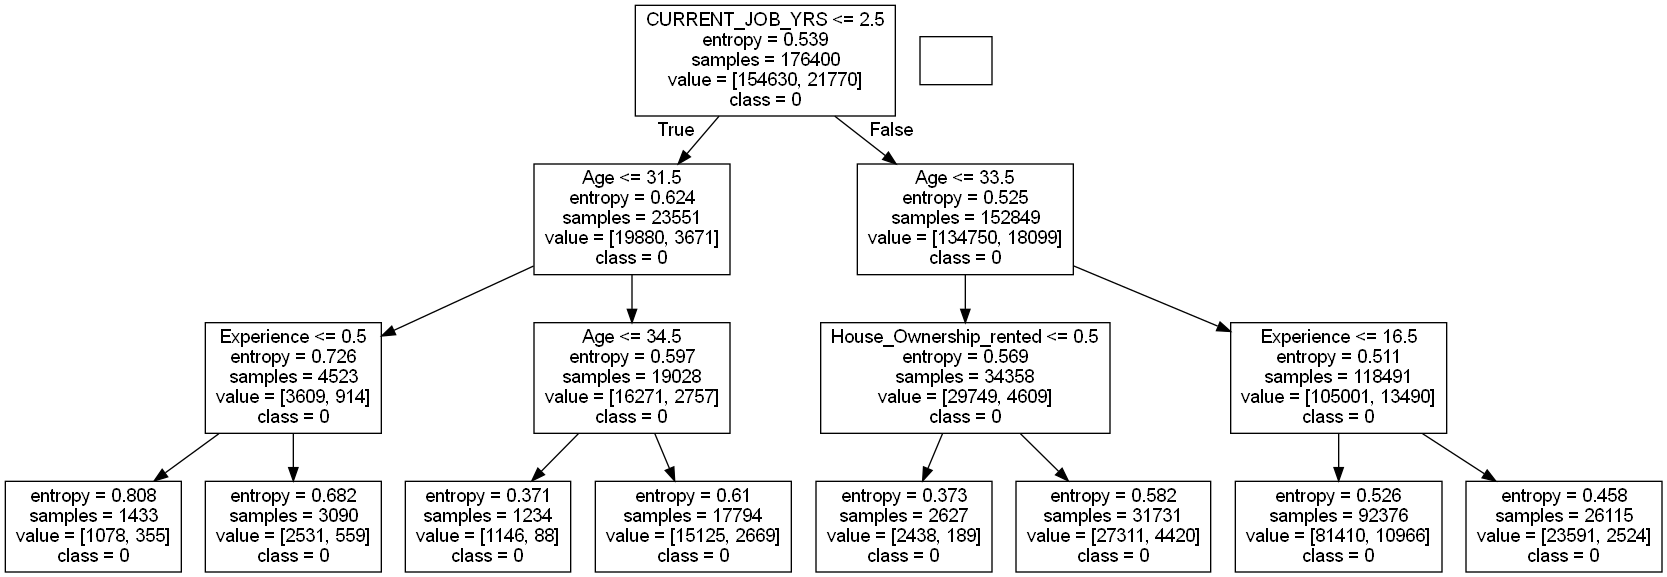

In [168]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DTree, out_file=None, 
                                feature_names=Predictors, class_names=['0','1'])
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in

### Random Forest



RandomForestClassifier(max_depth=4, n_estimators=200)
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

[[66374     0]
 [ 9226     0]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation: 
 [0.8195642  0.8195642  0.8195642  0.8195642  0.81950737 0.81950737
 0.81950737 0.81950737 0.81950737 0.81950737]

Final Average Accuracy of the model: 0.82


<Axes: >

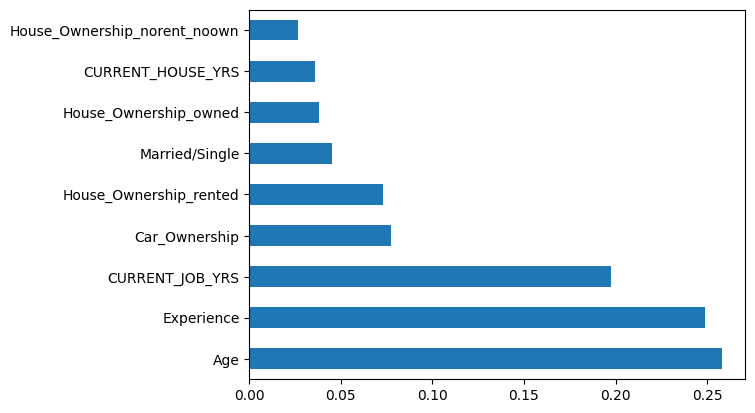

In [171]:
#Random Forest (Bagging of multiple Decision Trees) 
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, n_estimators=200, criterion='gini')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF= clf.fit(X_train,y_train) 
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Prinitng the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction,average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                                                                                       
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
                                                                                       
# Running 10-Fold Cross validation on a given algorithm
#Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns 
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors) 
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision Trees in Random Forest


In [244]:
!pip install dtreeplt
!pip install matplotlib


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for matplotlib>=3.0.2 from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



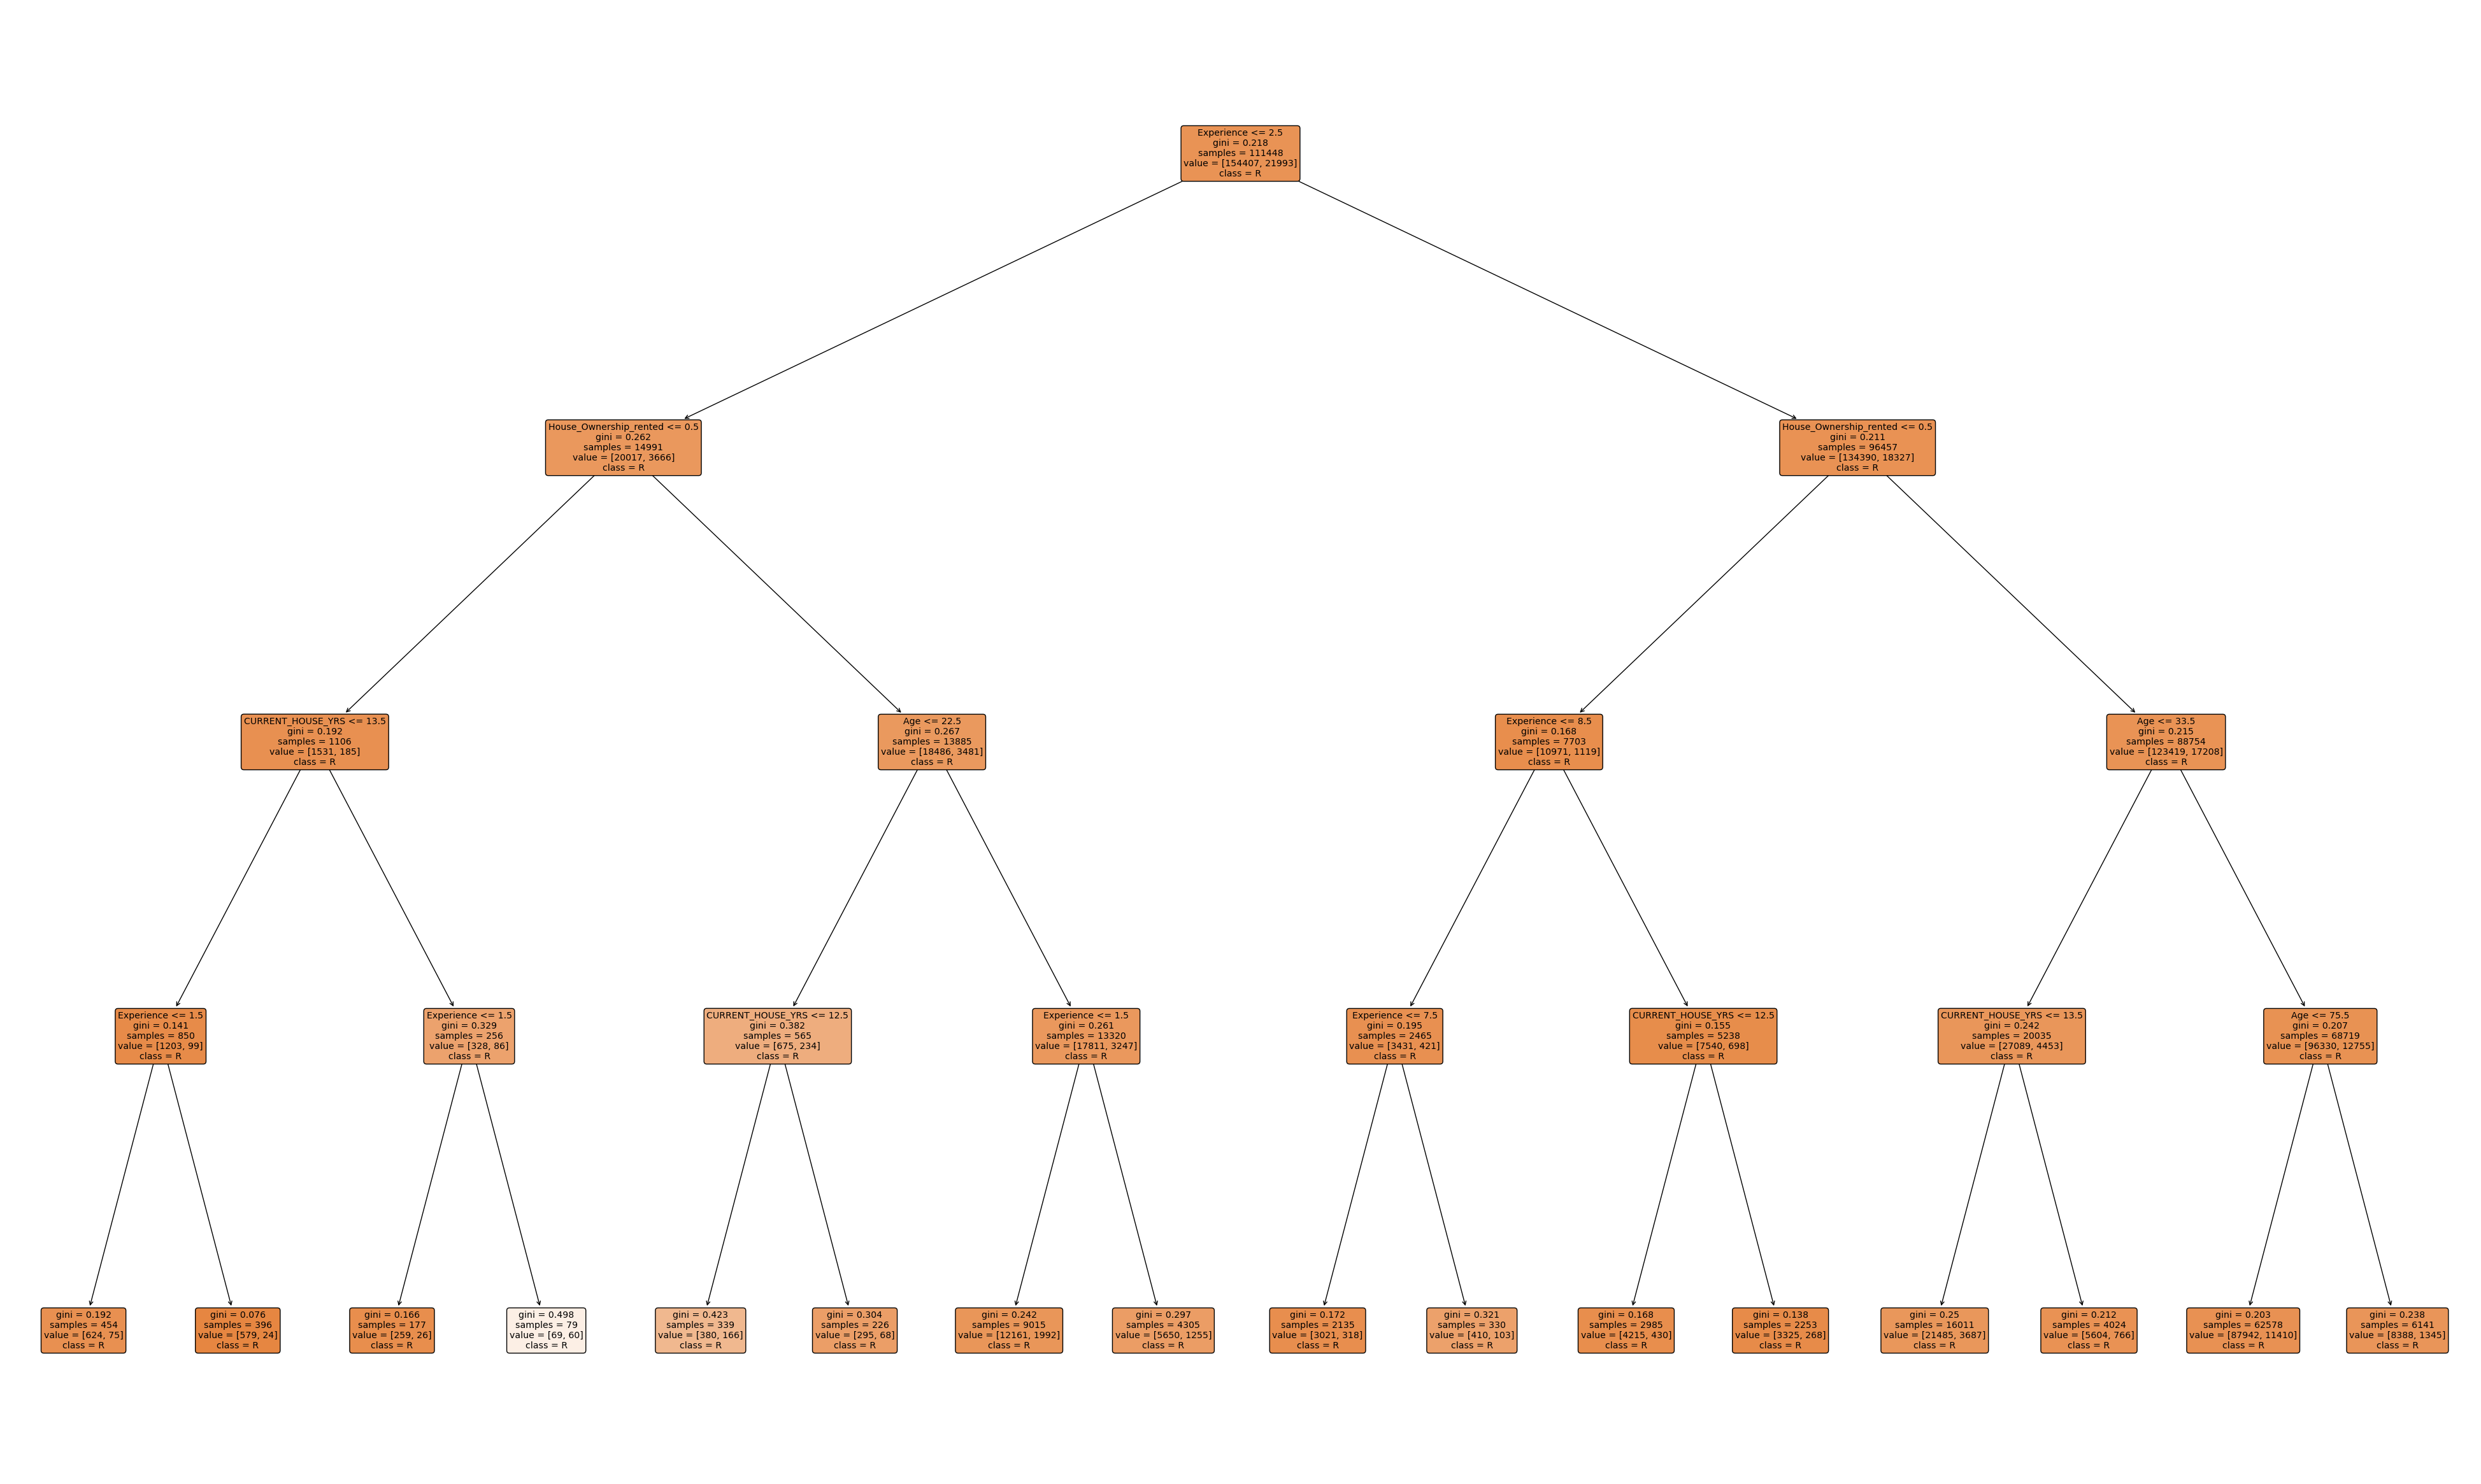

In [173]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf' is your RandomForestRegressor
# Choose the tree you want to plot, e.g., the 6th tree (index 5)
tree_to_plot = clf.estimators_[5]

# Set the figure size before creating the plot
plt.figure(figsize=(50, 30))  # Adjust width and height as needed

# Plot the tree
plot_tree(tree_to_plot, feature_names=Predictors, filled=True, rounded=True, class_names=list(TargetVariable))

# Show the plot
plt.show()

## AdaBoost


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, n_estimators=100)
R2 Value: -0.14078768673607978
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

[[66374     0]
 [ 9226     0]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation: 
 [0.8195642  0.8195642  0.8195642  0.8195642  0.81950737 0.81950737
 0.81950737 0.81950737 0.81950737 0.81950737]

Final Average Accuracy of the model: 0.82


<Axes: >

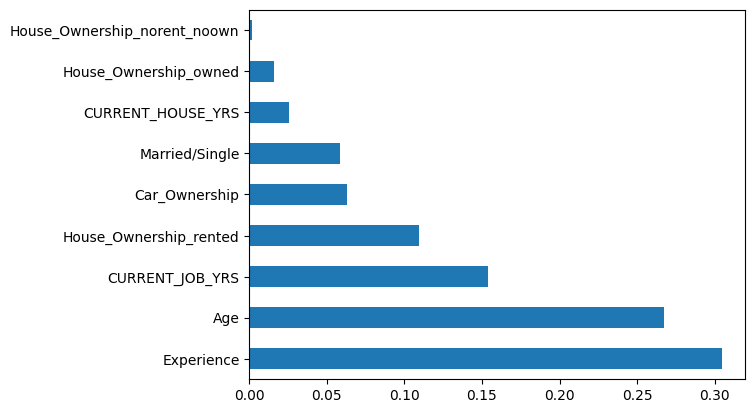

In [178]:
#Adaboost (Boosting of multiple Decision Trees) 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 5 level as the weak learner 
DTR=DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTR, learning_rate=0.01)

# Printing all the parameters of Adaboost
print (clf)

# Creating the model on Training Data
AB=clf.fit (X_train, y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score (y_train, AB. predict (X_train)))

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Prinitng the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction,average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                                                                                       
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
                                                                                       
# Running 10-Fold Cross validation on a given algorithm
#Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(AB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns 
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors) 
feature_importances.nlargest(10).plot(kind='barh')

### Plotting one of the Decision trees from Adaboost

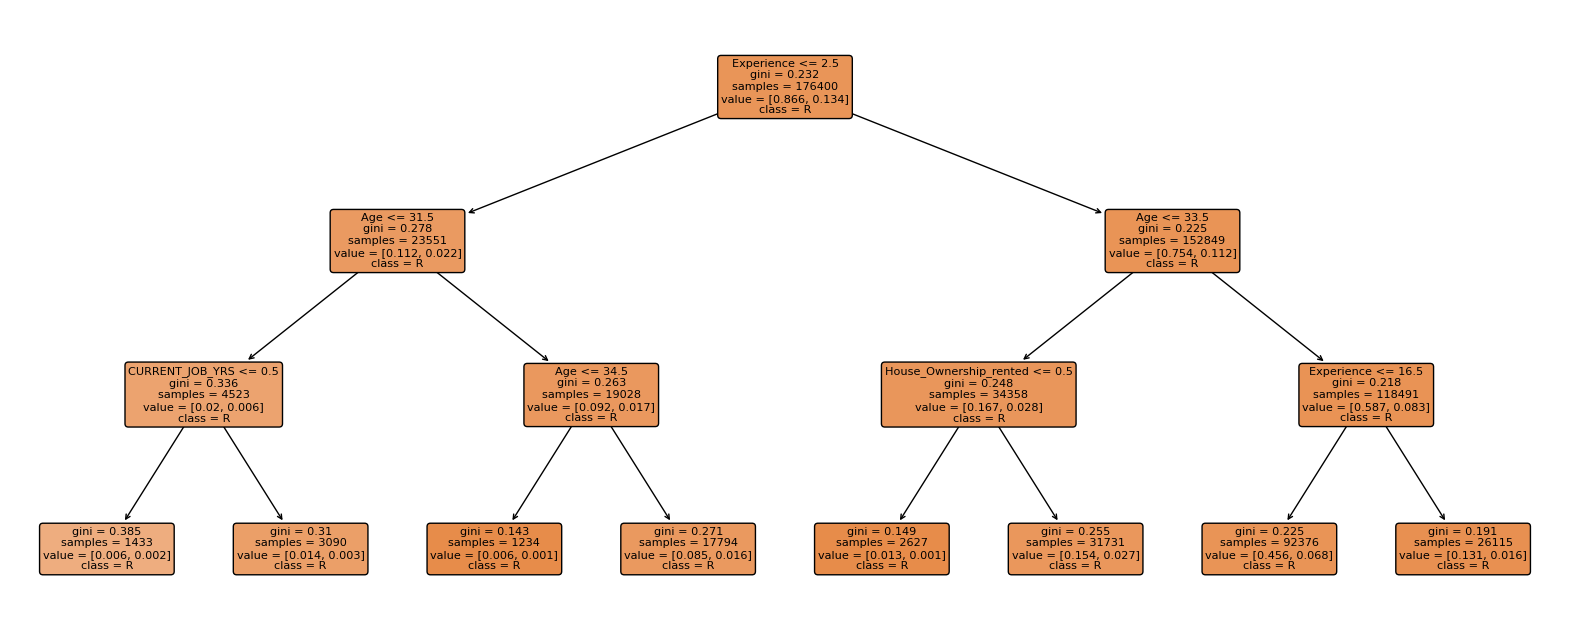

In [179]:
#PLotting 5th single Decision Tree from Adaboost 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the tree you want to plot, e.g., the 6th tree (index 5)
tree_to_plot = clf.estimators_[5]

# Set the figure size before creating the plot
plt.figure(figsize=(20, 8))  # Adjust width and height as needed

# Plot the tree
plot_tree(tree_to_plot, feature_names=Predictors, filled=True, rounded=True, class_names=list(TargetVariable))

# Show the plot
plt.show()
# #Load libraries
# from IPython.display import Image
# from sklearn import tree
# import pydotplus

# # Create DOT data for the 6th Decision Tree in Adaboost
# dot_data = tree.export_graphviz (clf.estimators_[10], out_file=None, feature_names=Predictors, class_names=list(TargetVariable))

# #Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)
                                 
# # Show graph
# Image(graph.create_png(), width = 1200, height = 900)
                                 
# # Double click to enlarge the graph

In [180]:
# !pip install dtreeplt


## XGBoost

In [181]:
import xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44  

<Axes: >

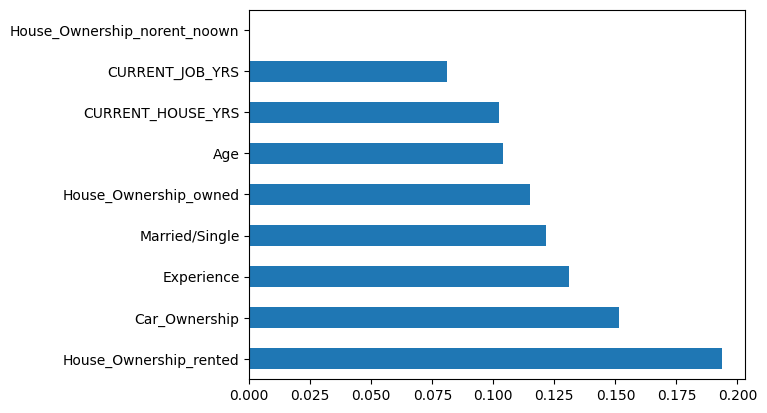

In [185]:
#In Xtreme Gradient Boosting (XGBoost) 
import pandas as pd
import numpy as np
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split
clf = XGBClassifier(max_depth=2,
                        learning_rate=0.1,
                        n_estimators=200,
                        objective='binary:logistic',
                        booster='gbtree',
                        )

#Printing all the parameters of XGBoost
print (clf)

# Creating the model on Training Data
XGB=clf.fit(X_train, y_train) 
prediction=XGB. predict (X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Prinitng the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction,average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                                                                                       
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
                                                                                       
# Running 10-Fold Cross validation on a given algorithm
#Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns 
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors) 
feature_importances.nlargest(10).plot(kind='barh')

### Plotting a single Decision tree out of XGBoost


In [398]:
# Setting up the os path for the Graphviz
import os
os.environ['Path'] += os.pathsep + 'C:/ProgramData/anaconda3/Library/bin'

<Axes: >

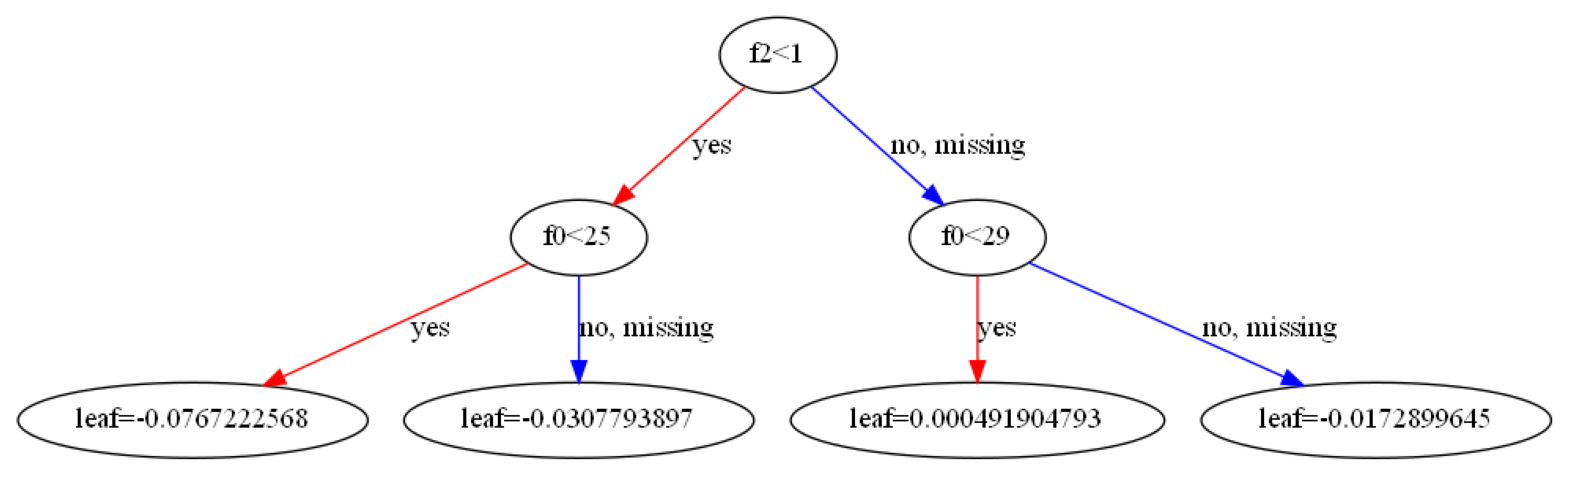

In [186]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)
# Double click on the graph to zoom in

## KNN

In [201]:
# K-Nearest Neighbor (KNN)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print (clf)

# Creating the model on Training Data
KNN = clf.fit(X_train, y_train) 
prediction = KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Prinitng the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction,average = 'weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

                                                                                       
#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
                                                                                       
# Running 10-Fold Cross validation on a given algorithm
#Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(KNN, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))

# # Plotting the feature importance for Top 10 most important columns 
# %matplotlib inline
# feature_importances = pd.Series(RF.feature_importances_, index=Predictors) 
# feature_importances.nlargest(10).plot(kind='barh')


KNeighborsClassifier(n_neighbors=4)
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     66329
           1       0.54      0.31      0.40      9271

    accuracy                           0.88     75600
   macro avg       0.73      0.64      0.67     75600
weighted avg       0.86      0.88      0.87     75600

[[63882  2447]
 [ 6359  2912]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation: 
 [0.93857954 0.930982   0.91069826 0.91236502 0.88649598 0.90542628
 0.87328333 0.87220293 0.80957748 0.7850699 ]

Final Average Accuracy of the model: 0.88


# SVM

In [ ]:
# Support Vector Machines (SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN 
print (clf)

# Creating the model on Training Data 
SVM=clf.fit(X_train, y_train)
prediction-SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print (metrics.classification_report (y_test, prediction)) 
print (metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average= 'weighted') 
print('Accuracy of the model on Testing Sample Data:', round (F1_Score, 2))

# Importing cross validation function from sklearn 
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score (SVM, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series (SVM. coef_[0], index=Predictors) 
#feature_importances.nlargest (10). plot (kind='barh')


SVC(C=20, gamma=0.01)


# Naive Bayes

In [36]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification 
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes 
print (clf)

NB=clf.fit(X_train, y_train)
prediction=NB.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print (metrics.classification_report (y_test, prediction)) 
print (metrics.confusion_matrix (y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score (y_test, prediction, average ='weighted')
print('Accuracy of the model on Testing Sample Data:', round (F1_Score, 2))

#Importing cross validation function from sklearn 
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(NB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))



GaussianNB()
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     66374
           1       0.00      0.00      0.00      9226

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

[[66374     0]
 [ 9226     0]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation: 
 [0.8195642  0.8195642  0.8195642  0.8195642  0.81950737 0.81950737
 0.81950737 0.81950737 0.81950737 0.81950737]

Final Average Accuracy of the model: 0.82


## Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.
I am choosing __KNN__ as the final model since it is producing the best accuracy on this data.
In order to deploy the model we follow below steps

1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction



### Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.
This is important specially when the data is high dimensional (too many predictor columns).
In this data, the most important predictor variables are 'Fare', 'Sex', 'Parch','Pclass'.
As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables


In [37]:
#Separate Target Variable and Predictor Variables
TargetVariable='Risk'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above 
Predictors=['Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'House_Ownership_norent_noown',
       'House_Ownership_owned', 'House_Ownership_rented']

X=DataForML_Numeric[ Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler() 
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference 
PredictorScalerFit=PredictorScaler.fit(X)

#Generating the standardized values of X 
X=PredictorScalerFit.transform(X)
                    
print(X.shape)
print(y.shape)


(252000, 9)
(252000,)


### Step 1. Retraining the model using 100% data

In [38]:
# K-Nearest Neighbor (KNN)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

#Training the model on 100% Data available
FinalDecisionTreeModel=clf.fit(X,y)


### Cross validating the final model accuracy with less predictors

In [39]:
# Importing cross validation function from sklearn 
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data x and y because the K-fold will split the data and automatically choos 
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values) 
print('\nFinal Average Accuracy of the model:', round (Accuracy_Values.mean(),2))




Accuracy values for 10-fold Cross Validation:
 [0.93857954 0.930982   0.91069826 0.91236502 0.88649598 0.90542628
 0.87328333 0.87220293 0.80957748 0.7850699 ]

Final Average Accuracy of the model: 0.88


### Step 2. Save the model as a serialized file which can be stored anywhere

In [40]:
import pickle 
import os

#Saving the Python objects as serialized files can be done using pickle library 
# Here let us save the Final model
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
        pickle.dump(FinalDecisionTreeModel, fileWriteStream)
        # Don't forget to close the filestream! 
        fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:', os.getcwd())


pickle file of Predictive Model is saved at Location: C:\Users\Administrator\Project Machine Learning & Deep Learning\Loan Prediction Based on Customer Behavior Classification


### Step 3. Create a python function

In [56]:
# This Function can be called from any from any front end tool/website 
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs= InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model 
    #Also, if standardization/normalization was done, then same must be done for new inpu
    
    
    # Converting the binary nominal variable sex to numeric 
    InputData['Married/Single'].replace({'married':0, 'single':1}, inplace=True)
    InputData['Car_Ownership'].replace({'no':0, 'yes':1}, inplace=True)
    
    #Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
    
    #Maintaining the same order of columns as it was during the model training 
    Predictors=['Age', 'Experience', 'Married/Single', 'Car_Ownership',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'House_Ownership_norent_noown',
       'House_Ownership_owned', 'House_Ownership_rented']
    
    #Generating the input values to the model 
    X=InputData[Predictors].values[0:Num_Inputs]

    #Generating the standardized values of X since it was done while model training also 
    X=PredictorScalerFit.transform(X)
    
    #Loading the Function from pickle file
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)
        # Don't forget to close the filestream! 
        fileReadStream.close()
   
        # Genrating Predictions
        Prediction = PredictionModel.predict(X)
        PredictionResult = pd.DataFrame(Prediction, index = testDF['ID'],columns=['Risk_Flag'])
        PredictionResult.to_csv('Result.csv')
    return PredictionResult


In [57]:
# Calling the function for some new cases
testDF= pd.read_csv("Test Data.csv",encoding= 'latin-1')

print (testDF)

# Calling the Function for prediction
FunctionPredictResult(InputData= testDF)


          ID   Income  Age  Experience Married/Single House_Ownership  \
0          1  7393090   59          19         single          rented   
1          2  1215004   25           5         single          rented   
2          3  8901342   50          12         single          rented   
3          4  1944421   49           9        married          rented   
4          5    13429   25          18         single          rented   
...      ...      ...  ...         ...            ...             ...   
27995  27996  9955481   57          13         single          rented   
27996  27997  2917765   47           9         single          rented   
27997  27998  8082415   24           5         single          rented   
27998  27999  9474180   51          13         single          rented   
27999  28000  9250350   42           9         single          rented   

      Car_Ownership            Profession            CITY           STATE  \
0                no             Geologist     

,Risk_Flag
ID,
1,0
2,0
3,0
4,0
5,0
...,...
27996,0
27997,0
27998,0
